In [399]:
%pip install nltk
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/marabots/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/home/marabots/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [400]:
import yfinance as yf


In [401]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/marabots/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/marabots/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [402]:
import requests
import json
import os

In [403]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
import statsmodels.api as sm

# Data

## yahoo + nyt

In [405]:
stocks = 'FB AAPL GOOG MSFT'

prices = data = yf.download(stocks, start="2014-01-01", end="2015-12-31")

[*********************100%***********************]  4 of 4 completed


In [406]:
prices = prices.swaplevel(1,0,axis=1)
prices

,AAPL,FB,GOOG,MSFT,AAPL,FB,GOOG,MSFT,AAPL,FB,...,GOOG,MSFT,AAPL,FB,GOOG,MSFT,AAPL,FB,GOOG,MSFT
,Adj Close,Adj Close,Adj Close,Adj Close,Close,Close,Close,Close,High,High,...,Low,Low,Open,Open,Open,Open,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,17.494322,54.709999,554.481689,31.864082,19.754642,54.709999,554.481689,37.160000,19.893929,55.220001,...,552.060730,37.099998,19.845715,54.830002,555.647278,37.349998,234684800,43195500,3656454,30632200
2014-01-03,17.110046,54.560001,550.436829,31.649694,19.320715,54.560001,550.436829,36.910000,19.775000,55.650002,...,550.401978,36.599998,19.745001,55.020000,555.418152,37.200001,392467600,38246200,3345894,31134800
2014-01-06,17.203344,57.200001,556.573853,30.980864,19.426071,57.200001,556.573853,36.130001,19.528570,57.259998,...,551.154114,36.110001,19.194643,54.419998,554.426880,36.849998,412610800,68852600,3551864,43603700
2014-01-07,17.080309,57.919998,567.303589,31.220957,19.287144,57.919998,567.303589,36.410000,19.498571,58.549999,...,558.486633,36.209999,19.440001,57.700001,560.399475,36.330002,317209200,77207400,5124336,35802800
2014-01-08,17.188478,58.230000,568.484192,30.663588,19.409286,58.230000,568.484192,35.759998,19.484285,58.410000,...,564.528992,35.580002,19.243214,57.599998,570.860291,36.000000,258529600,56682400,4501811,59971700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,24.970072,104.629997,750.309998,50.514099,27.152500,104.629997,750.309998,55.820000,27.212500,106.110001,...,744.000000,55.439999,26.817499,105.889999,753.469971,55.700001,130629600,19599700,1565900,27279800
2015-12-24,24.836725,105.019997,748.400024,50.378368,27.007500,105.019997,748.400024,55.669998,27.250000,105.320000,...,746.619995,55.430000,27.250000,104.739998,749.549988,55.860001,54281600,6501800,527200,9558500


In [407]:
#key = open(os.path('/storage/apps/time2series/key.txt'))
path = os.path.abspath('../key.txt')
f = open(path)
key = f.readline()
f.close()


In [408]:
news_pop = requests.get('https://api.nytimes.com/svc/mostpopular/v2/viewed/1.json?api-key='+key)
#news_pop.json()


{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/6b72a1a1-2ad8-5ad1-b1d7-3fae6a2e8891',
   'url': 'https://www.nytimes.com/2022/02/05/world/africa/morocco-boy-well.html',
   'id': 100000008193517,
   'asset_id': 100000008193517,
   'source': 'New York Times',
   'published_date': '2022-02-05',
   'updated': '2022-02-06 10:05:28',
   'section': 'World',
   'subsection': 'Africa',
   'nytdsection': 'world',
   'adx_keywords': 'Wells;Deaths (Fatalities);Falls;Rescues;Ighrane (Morocco)',
   'column': None,
   'byline': 'By Vivian Yee, Aida Alami and Mona El-Naggar',
   'type': 'Article',
   'title': 'Effort to Rescue a 5-Year-Old Transfixes Morocco, Only to End Sadly',
   'abstract': 'The four-day rescue operation failed to save the life of Rayan, who plunged down a 100-foot well, a devastating outcome to the many Moroccans who were captivated by the effort to save him.',
   'des_f

## Stocknet

https://paperswithcode.com/dataset/stocknet-1

In [409]:
stocks_list = stocks.split(' ')
prices = {}
tweets = {}

dates = pd.date_range(start='2014-01-01', end='2015-12-31')

for s in stocks_list:
    print(s)
    prices[s] = pd.read_csv('../data/stocknet-dataset/price/raw/'+s+'.csv')
    #prices[s] = pd.read_csv('../data/stocknet-dataset/price/preprocessed/'+s+'.csv')
    tweets[s] = {}
    for date in dates:
        date = str(date)[:10]
        #print(date)
        tweets[s][date] = []
        try:
            t = open('/storage/apps/text2series/data/stocknet-dataset/tweet/raw/'+s+'/'+date)
            for line in t.readlines():
                    tweets[s][date].append(json.loads(line)['text'])
        except:
            print('null')
        t.close()     
        

FB
2014-01-01
2014-01-02
2014-01-03
2014-01-04
2014-01-05
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-11
2014-01-12
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
null
2014-01-18
null
2014-01-19
2014-01-20
2014-01-21
2014-01-22
2014-01-23
2014-01-24
2014-01-25
2014-01-26
2014-01-27
2014-01-28
2014-01-29
2014-01-30
2014-01-31
2014-02-01
2014-02-02
2014-02-03
2014-02-04
2014-02-05
2014-02-06
2014-02-07
2014-02-08
2014-02-09
2014-02-10
2014-02-11
2014-02-12
2014-02-13
2014-02-14
2014-02-15
2014-02-16
2014-02-17
2014-02-18
2014-02-19
2014-02-20
2014-02-21
2014-02-22
2014-02-23
2014-02-24
2014-02-25
2014-02-26
2014-02-27
2014-02-28
2014-03-01
2014-03-02
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-08
2014-03-09
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-15
2014-03-16
2014-03-17
2014-03-18
2014-03-19
2014-03-20
2014-03-21
2014-03-22
2014-03-23
2014-03-24
2014-03-25
2014-03-26
2014-03-27
2014-03-28
2014-03-29
2014-03-30
2014-03-

# Sentiments

In [410]:
sentiments = {}
for s in stocks_list:
    sentiments[s] = {}
    for date in dates:
        date = str(date)[:10]
        sentiments[s][date] = {}
        for ix, tweet in enumerate(tweets[s][date]):
            sentiments[s][date][ix] = []
            sid = SentimentIntensityAnalyzer()
            #print(tweet)
            #tweet = tokenize.sent_tokenize(tweet)
            ss = sid.polarity_scores(tweet)
            for k in sorted(ss):
                #print('{0}: {1}, '.format(k, ss[k]), end='')
                sentiments[s][date][ix].append(ss[k])      

In [415]:
sdfs = {}
for s in stocks_list:    
    sentdf = pd.DataFrame(pd.DataFrame(sentiments[s]).T.stack()).reset_index()
    sentdf.columns = ['date','tweet','list']
    sentdf['size'] = sentdf['list'].apply(lambda x: len(list(x)))
    sentdf = sentdf.query('size > 0')
    sentdf['compound'] = sentdf['list'].apply(lambda x: x[0])
    sentdf['neg'] = sentdf['list'].apply(lambda x: x[1])
    sentdf['neu'] = sentdf['list'].apply(lambda x: x[2])
    sentdf['pos'] = sentdf['list'].apply(lambda x: x[3])
    sentdfd =  sentdf.groupby('date')[['compound','neg','neu','pos']].mean()
    #sentdfd =  sentdf.groupby('date')[['compound','neg','neu','pos']].max()
    sentdfd.index = pd.to_datetime(sentdfd.index)
    sdfs[s] = sentdfd

    

# Analysis

In [429]:
prices['FB']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,18.080000,18.270000,17.549999,17.730000,17.730000,46622400
1,2012-09-05,18.270000,18.750000,18.180000,18.580000,18.580000,60781800
2,2012-09-06,18.740000,19.260000,18.719999,18.959999,18.959999,46066500
3,2012-09-07,19.100000,19.420000,18.780001,18.980000,18.980000,36371700
4,2012-09-10,19.059999,19.200001,18.549999,18.809999,18.809999,24797800
...,...,...,...,...,...,...,...
1253,2017-08-28,166.910004,167.699997,166.330002,167.240005,167.240005,8553700
1254,2017-08-29,165.250000,168.429993,165.000000,168.050003,168.050003,11121000
1255,2017-08-30,168.169998,170.179993,167.630005,169.919998,169.919998,11138300
1256,2017-08-31,170.399994,172.149994,170.059998,171.970001,171.970001,17226500


In [438]:
prices['FB'].set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-04,18.080000,18.270000,17.549999,17.730000,17.730000,46622400
2012-09-05,18.270000,18.750000,18.180000,18.580000,18.580000,60781800
2012-09-06,18.740000,19.260000,18.719999,18.959999,18.959999,46066500
2012-09-07,19.100000,19.420000,18.780001,18.980000,18.980000,36371700
2012-09-10,19.059999,19.200001,18.549999,18.809999,18.809999,24797800
...,...,...,...,...,...,...
2017-08-28,166.910004,167.699997,166.330002,167.240005,167.240005,8553700
2017-08-29,165.250000,168.429993,165.000000,168.050003,168.050003,11121000
2017-08-30,168.169998,170.179993,167.630005,169.919998,169.919998,11138300


In [435]:
t2p['FB'] = prices['FB'].set_index('Date').merge(sdfs['FB'], left_index=True, right_index=True)
t2p['FB']

,Open,High,Low,Close,Adj Close,Volume,compound,neg,neu,pos


In [442]:
t2p = {}
for s in stocks_list:
    prices[s]['Date'] = pd.to_datetime(prices[s]['Date']) 
    t2p[s] = prices[s].merge(sdfs[s], left_on='Date', right_index=True)
    t2p[s]['Var'] = t2p[s]['Close'].pct_change().fillna(0) * 100

                FB      AAPL      GOOG      MSFT
Var       1.000000  1.000000  1.000000  1.000000
compound  0.057429  0.101295  0.082640  0.043040
neg      -0.053320 -0.138625 -0.027062 -0.027156
neu       0.019186  0.037991 -0.064441 -0.016209
pos       0.019258  0.050366  0.090777  0.042338


Text(0.5, 1.0, 'Correlation: Price variation x Tweets Sentiment')

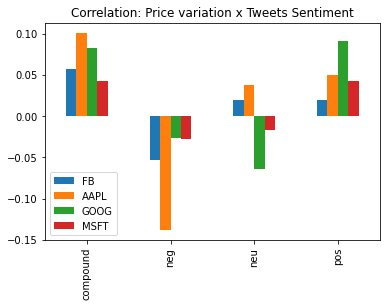

In [448]:
corrs = {}
for s in stocks_list:
    #print(s)
    #print(t2p[s][['Var', 'compound','neg','neu','pos']].corr()['Var'])
    corrs[s] = t2p[s][['Var', 'compound','neg','neu','pos']].corr()['Var']
print(pd.DataFrame(corrs))
pd.DataFrame(corrs).drop('Var').plot.bar().set_title('Correlation: Price variation x Tweets Sentiment')

In [445]:
ccfs = {}
i = 0
for s in stocks_list:
    for st in ['compound','neg','neu','pos']:
        ccf = sm.tsa.stattools.ccf(t2p[s][st], t2p[s]['Var'], adjusted=True, fft=True)[:10]
        ccfs[i] = {'stock': s, 
                    'sentiment': st,
                    'lag0': ccf[0],
                    'lag1': ccf[1],
                    'lag2': ccf[2],
                    'lag3': ccf[3],
                    'lag4': ccf[4],
                    'lag5': ccf[5],
                    'lag6': ccf[6]
                    }
        i += 1 


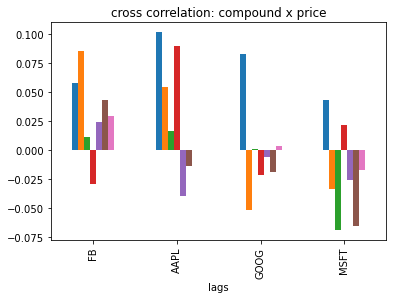

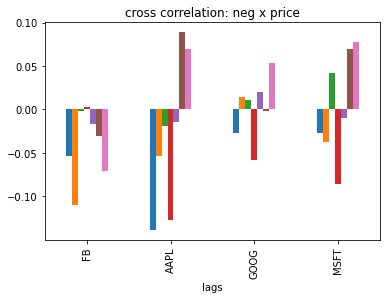

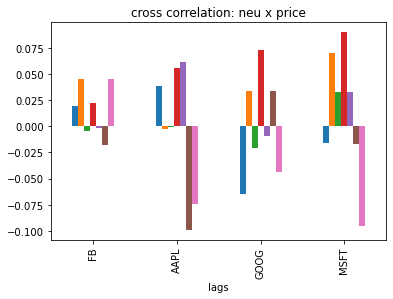

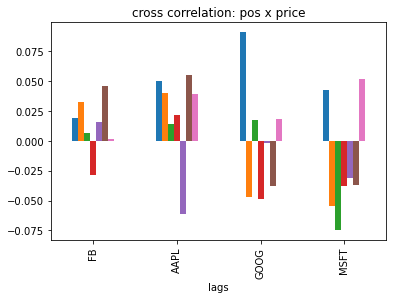

In [447]:
for st in ['compound','neg','neu','pos']:
    pd.DataFrame(ccfs).T.set_index(['sentiment','stock']).loc[st].plot.bar(legend=False, title='cross correlation: '+st+' x price', xlabel='lags').set